### MLP 1 layer

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

import os, sys
from pathlib import Path
sys.path.append(str(Path('.ipynb').resolve().parents[2]))
from IndStudy5840.optim.fista_multi_wo_prox import FISTA

class OneLayerNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(OneLayerNN, self).__init__()
        self.fc1 = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc1(x)

In [61]:
import numpy as np
from numpy import linalg as LA

n = 5000
p = 1000

X_np = np.random.randn(n, p)
Y_np = np.random.randn(n, 1)

X = torch.tensor(X_np, dtype=torch.float32)
Y = torch.tensor(Y_np, dtype=torch.float32)

lr = 1/(LA.norm(X_np))**2
lr


2.0001227224065022e-07

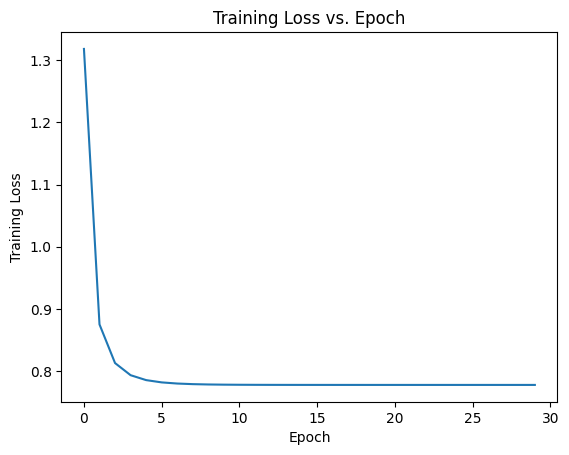

In [62]:
opt_method = "SGD"

# model processes X(n x p) to Y(n x 1)
model = OneLayerNN(input_size=p, output_size=1)
criterion = nn.MSELoss()

if opt_method == "SGD":
    optimizer = torch.optim.SGD(model.parameters(), lr=0.3)
elif opt_method == "FISTA":
    lr = 1/(LA.norm(X_np))**2
    optimizer = FISTA(model.parameters(), lr=lr)

# Train
N_epochs = 30
train_losses = []

# Closure
def closure():
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    return loss

for epoch in range(N_epochs):
    model.train()
    if opt_method == "FISTA":
        loss = optimizer.step(closure)
    elif opt_method == "SGD":
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())

plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Epoch")
plt.show()

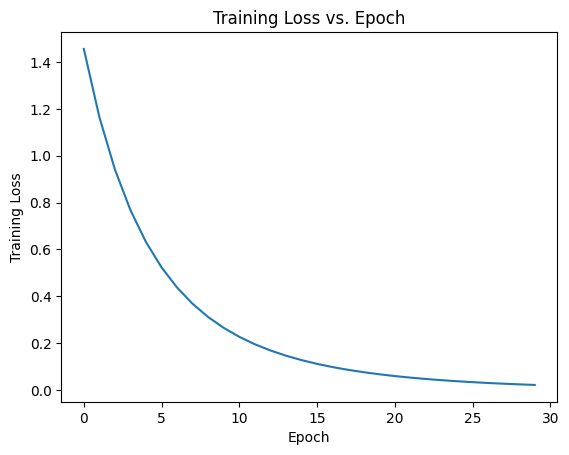

In [56]:
n = 1000
p = 5000
opt_method = "SGD"
# X is tensor input
X = torch.randn(n, p)

# Y is tensor output
Y = torch.randn(n, 1)

# model processes X(n x p) to Y(n x 1)
model = OneLayerNN(input_size=p, output_size=1)
criterion = nn.MSELoss()

if opt_method == "SGD":
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
elif opt_method == "FISTA":
    optimizer = FISTA(model.parameters(), lr=0.1)

# Train
N_epochs = 30
train_losses = []

# Closure
def closure():
    optimizer.zero_grad()
    outputs = model(X)
    loss = criterion(outputs, Y)
    loss.backward()
    return loss

for epoch in range(N_epochs):
    model.train()
    if opt_method == "FISTA":
        loss = optimizer.step(closure)
    elif opt_method == "SGD":
        optimizer.zero_grad()
        outputs = model(X)
        loss = criterion(outputs, Y)
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item())

plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss vs. Epoch")
plt.show()